<a href="https://colab.research.google.com/github/Rithikkaa-17/Silicon-Replacement-Prediction-using-ML/blob/main/Sliicon_Replacement_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymatgen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 44.1 MB/s eta 0:00:00


In [2]:
!pip install --upgrade pymatgen

In [3]:
from pymatgen.ext.matproj import MPRester
import pandas as pd
API_KEY = "VWObDvCj8q0BG8b9n6sRYJ3tbLjioho6"
mpr = MPRester(API_KEY)
materials = mpr.summary.search(elements=["Cs", "Pb", "I"], chemsys=["Cs-Pb-I"])
print(f"Retrieved {len(materials)} materials.")
data = []
for material in materials:
    data.append({
        "material_id": material.get("material_id"),
        "formula": material.get("formula_pretty"),
        "band_gap": material.get("band_gap"),
        "density": material.get("density"),
        "formation_energy_per_atom": material.get("formation_energy_per_atom"),
        "energy_above_hull": material.get("energy_above_hull"),
    })
df = pd.DataFrame(data)
print(df.head())
df.to_csv("perovskite_solar_cell_dataset.csv", index=False)
print("Dataset saved as 'perovskite_solar_cell_dataset.csv'")

Retrieved 5 materials.
  material_id  formula  band_gap   density  formation_energy_per_atom  \
0  mp-1069538   CsPbI3    1.4785  4.844004                  -1.238177   
1  mp-1120768   CsPbI3    1.6421  4.746507                  -1.247403   
2   mp-540839   CsPbI3    2.5181  5.143480                  -1.263227   
3  mp-1238789  CsPb2I5    1.9459  5.510956                  -1.097308   
4  mp-1238804  Cs4PbI6    3.4095  4.281369                  -1.528861   

   energy_above_hull  
0           0.025049  
1           0.015823  
2           0.000000  
3           0.037909  
4           0.000000  
Dataset saved as 'perovskite_solar_cell_dataset.csv'


In [4]:
from pymatgen.ext.matproj import MPRester
import pandas as pd
API_KEY = "VWObDvCj8q0BG8b9n6sRYJ3tbLjioho6"
mpr = MPRester(API_KEY)
materials = mpr.summary.search(
    band_gap_min=1.1,
    band_gap_max=1.7,
    energy_above_hull_max=0.1
)
print(f"Retrieved {len(materials)} materials.")
data = []
for material in materials:
    data.append({
        "material_id": material.get("material_id"),
        "formula": material.get("formula_pretty"),
        "band_gap": material.get("band_gap"),
        "density": material.get("density"),
        "formation_energy_per_atom": material.get("formation_energy_per_atom"),
        "energy_above_hull": material.get("energy_above_hull"),
    })
df = pd.DataFrame(data)
print(df.head())
df.to_csv("potential_absorber_materials_filtered.csv", index=False)
print("Dataset saved as 'potential_absorber_materials_filtered.csv'")

Retrieved 8047 materials.
  material_id       formula  band_gap   density  formation_energy_per_atom  \
0   mp-560328  Ag15P4S16Cl3    1.2888  4.587131                  -0.481548   
1  mp-1215118  Ag16HgAs4S15    1.1099  5.570459                  -0.293770   
2   mp-559071   Ag2Bi2S3Cl2    1.6368  5.894386                  -0.747980   
3   mp-556345      Ag2BrNO3    1.6045  5.030350                  -0.655070   
4   mp-861942     Ag2GePbS4    1.3699  5.680462                  -0.549878   

   energy_above_hull  
0           0.000000  
1           0.005915  
2           0.004958  
3           0.019581  
4           0.000000  
Dataset saved as 'potential_absorber_materials_filtered.csv'


In [5]:
import pandas as pd
df = pd.read_csv("potential_absorber_materials_filtered.csv")
print(df.head())
print(f"The dataset contains {df.shape[0]} materials and {df.shape[1]} columns.")

  material_id       formula  band_gap   density  formation_energy_per_atom  \
0   mp-560328  Ag15P4S16Cl3    1.2888  4.587131                  -0.481548   
1  mp-1215118  Ag16HgAs4S15    1.1099  5.570459                  -0.293770   
2   mp-559071   Ag2Bi2S3Cl2    1.6368  5.894386                  -0.747980   
3   mp-556345      Ag2BrNO3    1.6045  5.030350                  -0.655070   
4   mp-861942     Ag2GePbS4    1.3699  5.680462                  -0.549878   

   energy_above_hull  
0           0.000000  
1           0.005915  
2           0.004958  
3           0.019581  
4           0.000000  
The dataset contains 8047 materials and 6 columns.


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)

     material_id                  formula  band_gap    density  \
0      mp-560328             Ag15P4S16Cl3    1.2888   4.587131   
1     mp-1215118             Ag16HgAs4S15    1.1099   5.570459   
2      mp-559071              Ag2Bi2S3Cl2    1.6368   5.894386   
3      mp-556345                 Ag2BrNO3    1.6045   5.030350   
4      mp-861942                Ag2GePbS4    1.3699   5.680462   
5      mp-690687                 Ag2H2IOF    1.4591   5.044166   
6     mp-1229122                  Ag2HgI4    1.2764   5.746626   
7       mp-23485                  Ag2HgI4    1.2219   5.751902   
8      mp-570256                  Ag2HgI4    1.1004   5.727426   
9      mp-556866                 Ag2HgSI2    1.2212   5.874191   
10     mp-557396                  Ag2INO3    1.4835   5.242349   
11    mp-1190325                Ag2P2PdO7    1.1668   4.761193   
12     mp-707138                  Ag2PHO4    1.3274   4.997597   
13     mp-561822                   Ag2PS3    1.4401   4.447850   
14      mp

In [7]:
import pandas as pd
df = pd.read_csv("/content/potential_absorber_materials_filtered.csv")
print(df.isnull().sum())
df_cleaned = df.dropna()
print(f"Dataset after removing missing values: {df_cleaned.shape[0]} rows")
df_cleaned.to_csv("cleaned_file.csv", index=False)
print("Cleaned dataset saved as 'cleaned_file.csv'.")

material_id                  0
formula                      0
band_gap                     0
density                      0
formation_energy_per_atom    0
energy_above_hull            0
dtype: int64
Dataset after removing missing values: 8047 rows
Cleaned dataset saved as 'cleaned_file.csv'.


In [8]:
df_sorted = df.sort_values(by="band_gap")
print(df_sorted.head())

     material_id        formula  band_gap   density  \
7084  mp-1232289       Tb2MgSe4    1.1001  6.145012   
2960   mp-768724  Li24Mn7Cr5O36    1.1002  3.663116   
3679   mp-753101       Li4MnO3F    1.1002  2.642866   
8003     mp-8884           ZnTe    1.1003  5.610196   
8      mp-570256        Ag2HgI4    1.1004  5.727426   

      formation_energy_per_atom  energy_above_hull  
7084                  -1.936731           0.022769  
2960                  -2.200766           0.032051  
3679                  -2.251277           0.099144  
8003                  -0.678911           0.005252  
8                     -0.509957           0.002405  


In [9]:
import pandas as pd
file_path = "/content/cleaned_file.csv"
df = pd.read_csv(file_path)
silicon_band_gap_range = (1.1, 1.7)
silicon_density_range = (2.00, 2.4)
silicon_energy_above_hull_range = (0, 0.05)
filtered_df = df[
    (df["band_gap"].between(*silicon_band_gap_range)) &
    (df["density"].between(*silicon_density_range)) &
    (df["energy_above_hull"].between(*silicon_energy_above_hull_range))
]
filtered_file_path = "silicon_like_materials.csv"
filtered_df.to_csv(filtered_file_path, index=False)
print(f"Filtered {filtered_df.shape[0]} materials similar to silicon.")
print(filtered_df.head())

Filtered 108 materials similar to silicon.
    material_id      formula  band_gap   density  formation_energy_per_atom  \
98     mp-27452     Al2PdCl8    1.6860  2.279433                  -1.371737   
142     mp-1550          AlP    1.6294  2.348192                  -0.737249   
169    mp-30106        AsCl5    1.4376  2.343628                  -0.486201   
615  mp-1238119  Be2Co(NF7)2    1.3088  2.102140                  -1.723033   
824     mp-2482         CaC2    1.3593  2.221057                   0.022217   

     energy_above_hull  
98            0.019396  
142           0.000000  
169           0.017590  
615           0.049676  
824           0.022217  


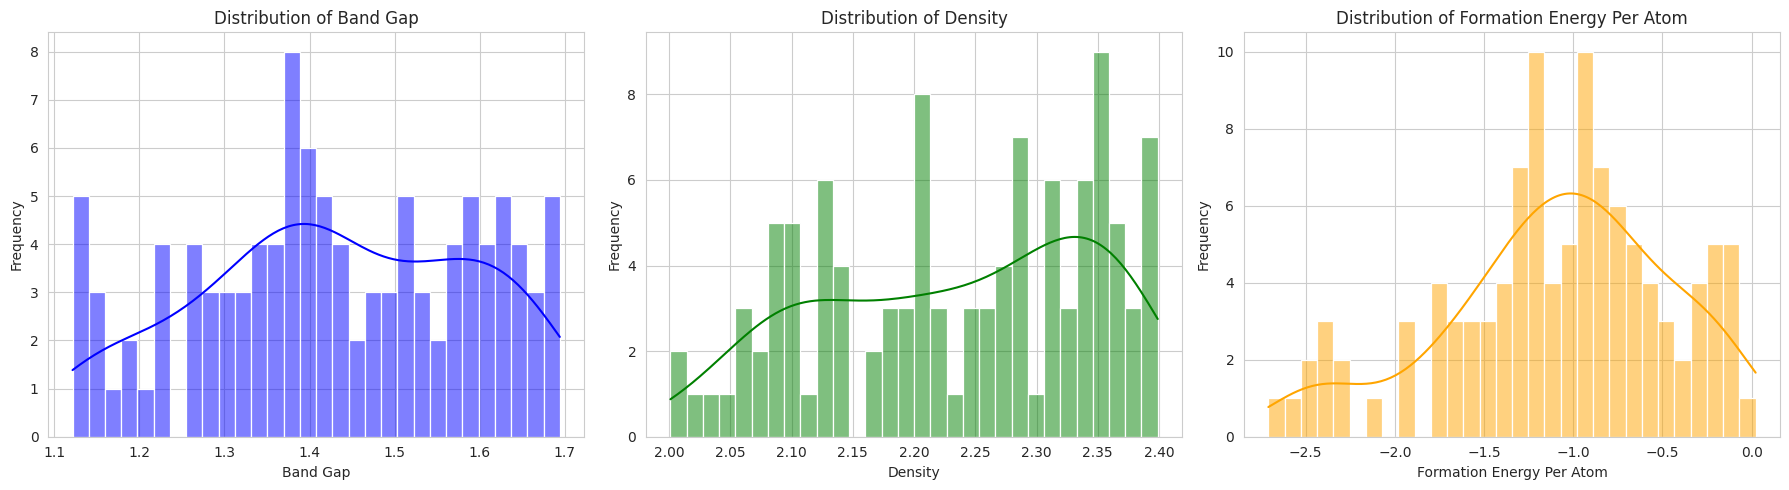

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/content/silicon_like_materials.csv"
df_cleaned = pd.read_csv(file_path)
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, col, color in zip(axes, ["band_gap", "density", "formation_energy_per_atom"], ["blue", "green", "orange"]):
    sns.histplot(df_cleaned[col], bins=30, kde=True, ax=ax, color=color)
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}")
    ax.set_xlabel(col.replace("_", " ").title())
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

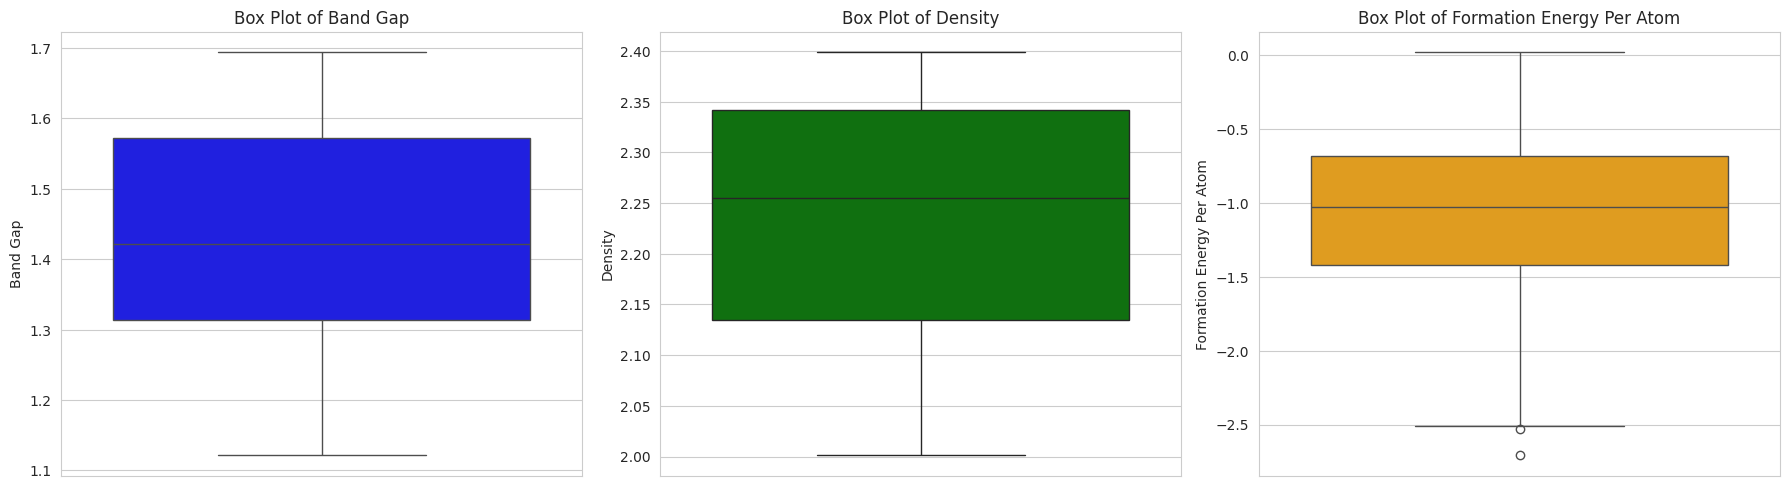

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, col, color in zip(axes, ["band_gap", "density", "formation_energy_per_atom"], ["blue", "green", "orange"]):
    sns.boxplot(y=df_cleaned[col], ax=ax, color=color)
    ax.set_title(f"Box Plot of {col.replace('_', ' ').title()}")
    ax.set_ylabel(col.replace("_", " ").title())

plt.tight_layout()
plt.show()

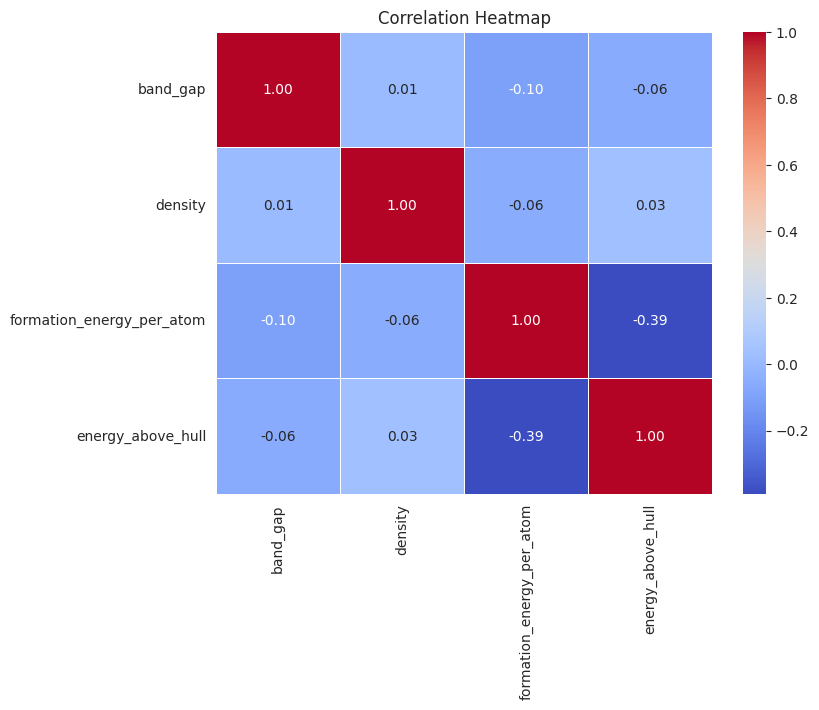

In [12]:
plt.figure(figsize=(8, 6))
correlation_matrix = df_cleaned[["band_gap", "density", "formation_energy_per_atom", "energy_above_hull"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

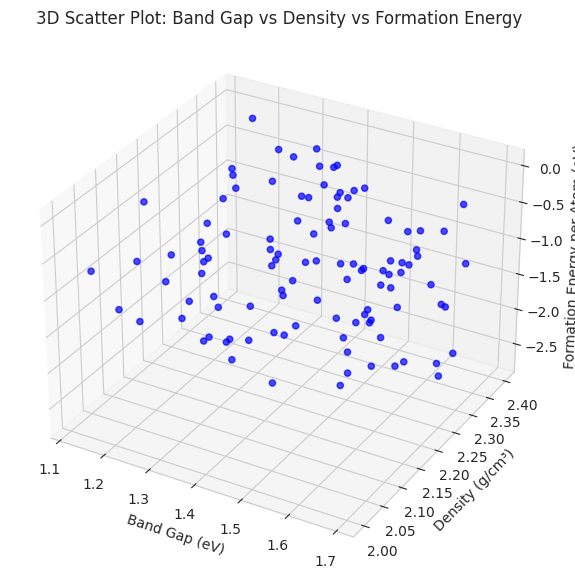

In [13]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df_cleaned["band_gap"], df_cleaned["density"], df_cleaned["formation_energy_per_atom"], c="blue", alpha=0.7)
ax.set_xlabel("Band Gap (eV)")
ax.set_ylabel("Density (g/cm³)")
ax.set_zlabel("Formation Energy per Atom (eV)")
ax.set_title("3D Scatter Plot: Band Gap vs Density vs Formation Energy")
plt.show()

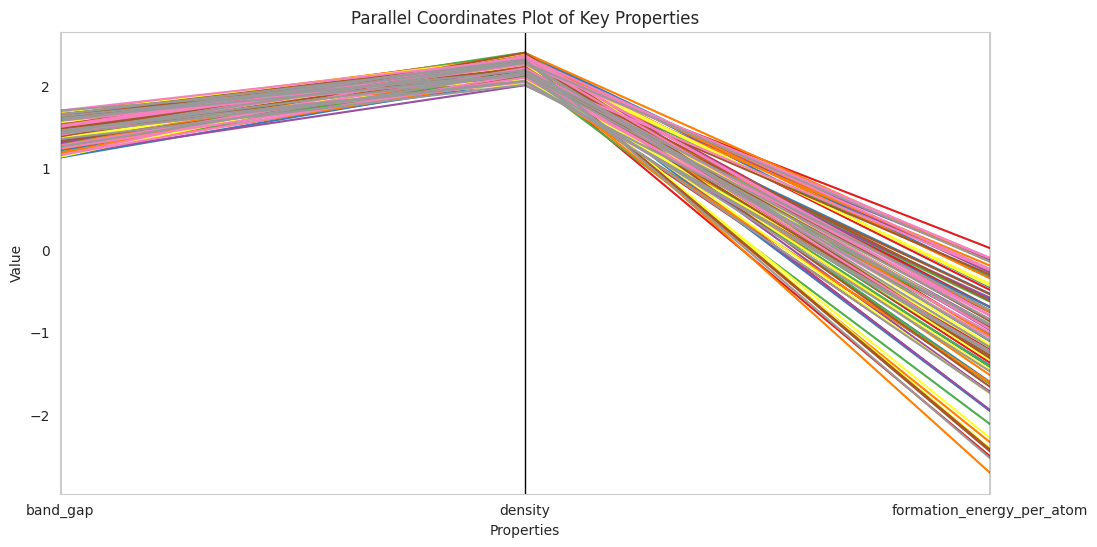

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
df_parallel = df_cleaned[["band_gap", "density", "formation_energy_per_atom"]].copy()
df_parallel["Material"] = df_cleaned.index.astype(str)
plt.figure(figsize=(12, 6))
parallel_coordinates(df_parallel, "Material", color=plt.cm.Set1(np.linspace(0, 1, len(df_parallel))))
plt.title("Parallel Coordinates Plot of Key Properties")
plt.xlabel("Properties")
plt.ylabel("Value")
plt.legend([], [], frameon=False)
plt.show()

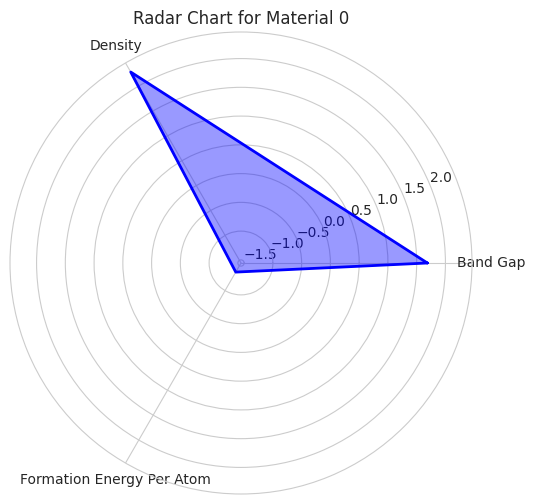

In [15]:
def plot_radar_chart(material_idx, features):
    categories = features
    values = df_cleaned.loc[material_idx, categories].values
    values = np.append(values, values[0])
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color="blue", alpha=0.4)
    ax.plot(angles, values, color="blue", linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([c.replace("_", " ").title() for c in categories])
    ax.set_title(f"Radar Chart for Material {material_idx}")
    plt.show()
features = ["band_gap", "density", "formation_energy_per_atom"]
plot_radar_chart(0, features)

In [16]:
import pandas as pd
import re
file_path = "silicon_like_materials.csv"
df_cleaned = pd.read_csv(file_path)
def is_abx3(formula):
    pattern = r"^([A-Z][a-z]?)(\d*)[A-Z][a-z]?\d*[A-Z][a-z]?3$"
    return bool(re.match(pattern, formula))
df_abx3 = df_cleaned[df_cleaned["formula"].apply(is_abx3)]
abx3_file_path = "abx3_compounds.csv"
df_abx3.to_csv(abx3_file_path, index=False)
print(f"Filtered dataset saved as: {abx3_file_path}")
print(f"Found {df_abx3.shape[0]} ABX₃ compounds.")
print(df_abx3.head())

Filtered dataset saved as: abx3_compounds.csv
Found 5 ABX₃ compounds.
   material_id  formula  band_gap   density  formation_energy_per_atom  \
21    mp-28766   K2TiS3    1.1215  2.307814                  -1.605307   
33   mp-998231   KGeCl3    1.4859  2.367040                  -1.627454   
41   mp-686129  Li5TiN3    1.5392  2.365273                  -0.973899   
58    mp-28955   Mg3BN3    1.3798  2.348393                  -1.045983   
80     mp-5929  Na5SiP3    1.3251  2.098138                  -0.540156   

    energy_above_hull  
21           0.000000  
33           0.028223  
41           0.000000  
58           0.030753  
80           0.000000  


In [17]:
import pandas as pd
df_abx3 = pd.read_csv("abx3_compounds.csv")
ideal_band_gap_range = (1.1, 1.7)
df_solar_candidates = df_abx3[(df_abx3["band_gap"] >= ideal_band_gap_range[0]) &
                              (df_abx3["band_gap"] <= ideal_band_gap_range[1])]
df_solar_candidates.to_csv("solar_candidate_materials.csv", index=False)
print(f"Found {len(df_solar_candidates)} materials suitable for solar cells.")
print(df_solar_candidates.head())

Found 5 materials suitable for solar cells.
  material_id  formula  band_gap   density  formation_energy_per_atom  \
0    mp-28766   K2TiS3    1.1215  2.307814                  -1.605307   
1   mp-998231   KGeCl3    1.4859  2.367040                  -1.627454   
2   mp-686129  Li5TiN3    1.5392  2.365273                  -0.973899   
3    mp-28955   Mg3BN3    1.3798  2.348393                  -1.045983   
4     mp-5929  Na5SiP3    1.3251  2.098138                  -0.540156   

   energy_above_hull  
0           0.000000  
1           0.028223  
2           0.000000  
3           0.030753  
4           0.000000  


In [18]:
import pandas as pd
df_solar = pd.read_csv("solar_candidate_materials.csv")
silicon_properties = {
    "band_gap": 1.12,
    "density": 2.33,  # g/cm³
    "formation_energy_per_atom": -1.18,  # eV
}
df_solar["band_gap_match"] = df_solar["band_gap"].apply(lambda x: "✔" if 1.1 <= x <= 1.7 else "✘")
df_solar["density_match"] = df_solar["density"].apply(lambda x: "✔" if abs(x - silicon_properties["density"]) <= 1 else "✘")
df_solar["formation_energy_match"] = df_solar["formation_energy_per_atom"].apply(lambda x: "✔" if x <= silicon_properties["formation_energy_per_atom"] else "✘")
df_solar.to_csv("solar_material_comparison.csv", index=False)
print("Comparison completed. Results saved as 'solar_material_comparison.csv'.")
print(df_solar.head())

Comparison completed. Results saved as 'solar_material_comparison.csv'.
  material_id  formula  band_gap   density  formation_energy_per_atom  \
0    mp-28766   K2TiS3    1.1215  2.307814                  -1.605307   
1   mp-998231   KGeCl3    1.4859  2.367040                  -1.627454   
2   mp-686129  Li5TiN3    1.5392  2.365273                  -0.973899   
3    mp-28955   Mg3BN3    1.3798  2.348393                  -1.045983   
4     mp-5929  Na5SiP3    1.3251  2.098138                  -0.540156   

   energy_above_hull band_gap_match density_match formation_energy_match  
0           0.000000              ✔             ✔                      ✔  
1           0.028223              ✔             ✔                      ✔  
2           0.000000              ✔             ✔                      ✘  
3           0.030753              ✔             ✔                      ✘  
4           0.000000              ✔             ✔                      ✘  


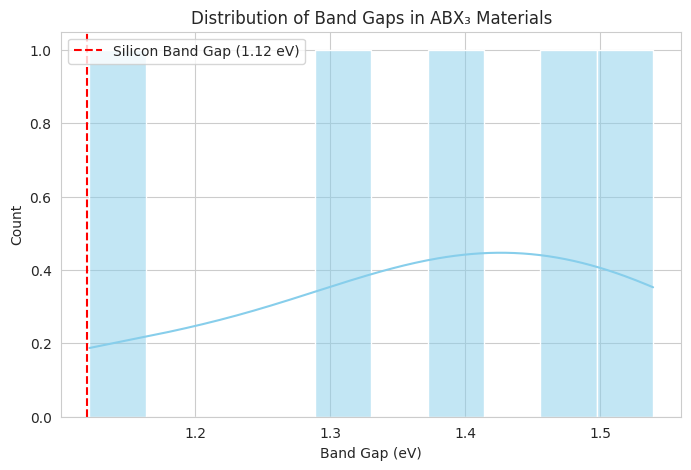

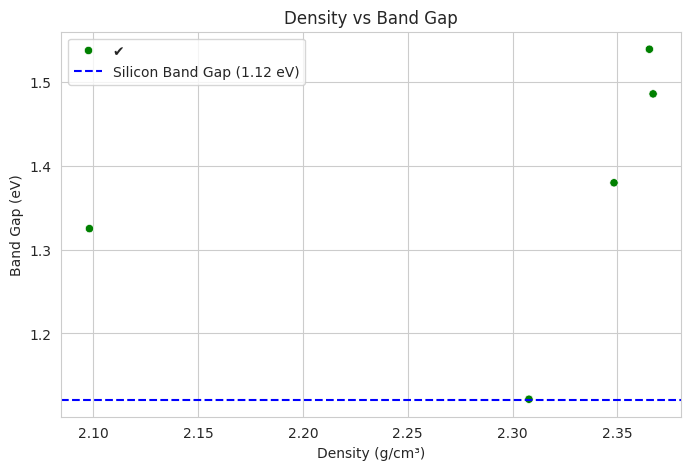

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("solar_material_comparison.csv")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df["band_gap"], bins=10, kde=True, color="skyblue")
plt.axvline(x=1.12, color="red", linestyle="dashed", label="Silicon Band Gap (1.12 eV)")
plt.xlabel("Band Gap (eV)")
plt.ylabel("Count")
plt.title("Distribution of Band Gaps in ABX₃ Materials")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="density", y="band_gap", hue="band_gap_match", palette={"✔": "green", "✘": "red"})
plt.axhline(y=1.12, color="blue", linestyle="dashed", label="Silicon Band Gap (1.12 eV)")
plt.xlabel("Density (g/cm³)")
plt.ylabel("Band Gap (eV)")
plt.title("Density vs Band Gap")
plt.legend()
plt.show()


In [20]:
import pandas as pd
df = pd.read_csv("/content/solar_candidate_materials.csv")
df_best = df[
    (df["band_gap"] >= 1.1) & (df["band_gap"] <= 1.7) &
    (df["energy_above_hull"] <= 0.1) &
    (df["formation_energy_per_atom"] < 0)
]
df_best.to_csv("best_solar_materials.csv", index=False)
print(f"Best solar candidates saved as 'best_solar_materials.csv'.")
print(df_best.head())

Best solar candidates saved as 'best_solar_materials.csv'.
  material_id  formula  band_gap   density  formation_energy_per_atom  \
0    mp-28766   K2TiS3    1.1215  2.307814                  -1.605307   
1   mp-998231   KGeCl3    1.4859  2.367040                  -1.627454   
2   mp-686129  Li5TiN3    1.5392  2.365273                  -0.973899   
3    mp-28955   Mg3BN3    1.3798  2.348393                  -1.045983   
4     mp-5929  Na5SiP3    1.3251  2.098138                  -0.540156   

   energy_above_hull  
0           0.000000  
1           0.028223  
2           0.000000  
3           0.030753  
4           0.000000  


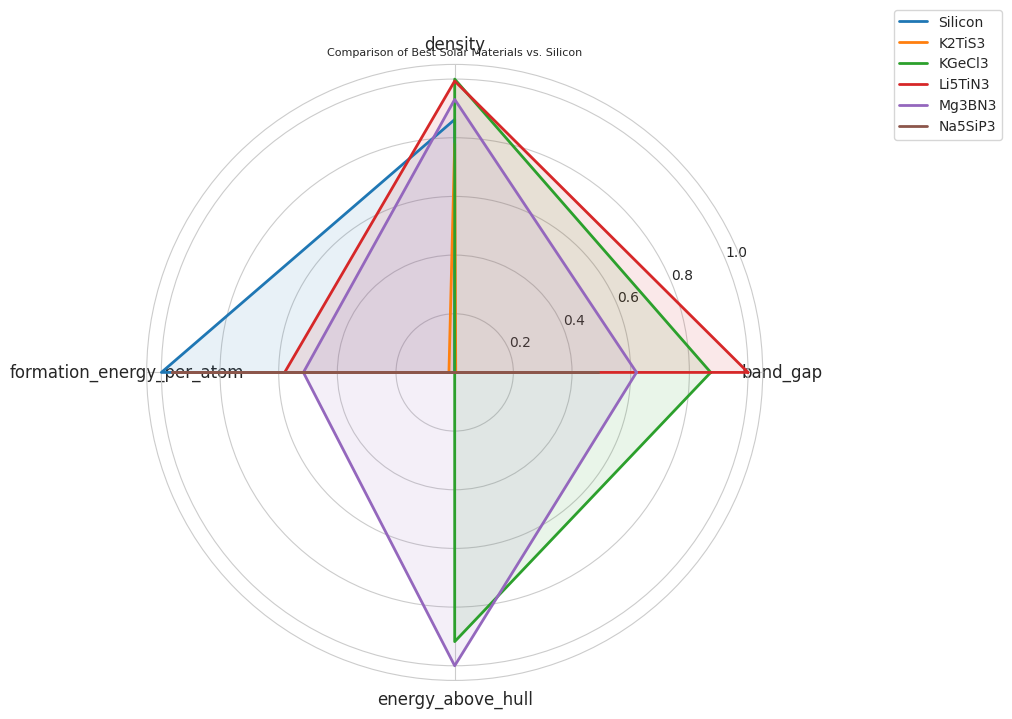

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_path = "best_solar_materials.csv"
df = pd.read_csv(file_path)
silicon_data = {
    "formula": "Silicon",
    "band_gap": 1.12,
    "density": 2.33,
    "formation_energy_per_atom": -0.5,
    "energy_above_hull": 0.0
}
df = pd.concat([pd.DataFrame([silicon_data]), df], ignore_index=True)
categories = ["band_gap", "density", "formation_energy_per_atom", "energy_above_hull"]
num_vars = len(categories)
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val) if max_val != min_val else 0.5
min_vals = df[categories].min()
max_vals = df[categories].max()
normalized_data = {
    row["formula"]: [normalize(row[prop], min_vals[prop], max_vals[prop]) for prop in categories]
    for _, row in df.iterrows()
}
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for mat, values in normalized_data.items():
    values += values[:1]
    ax.plot(angles, values, label=mat, linewidth=2)
    ax.fill(angles, values, alpha=0.1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_title("Comparison of Best Solar Materials vs. Silicon", fontsize=8)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1.1))
plt.show()

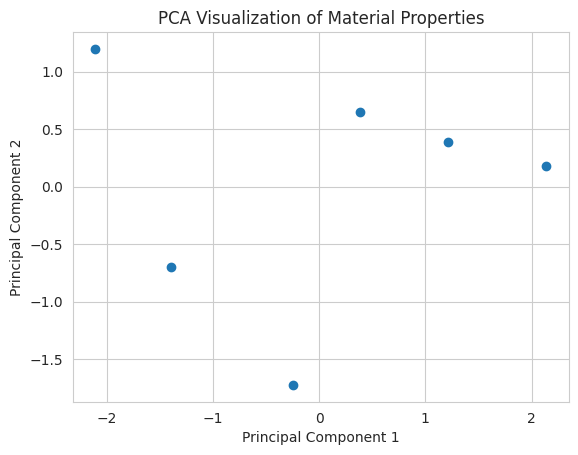

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df[['band_gap', 'density', 'formation_energy_per_atom', 'energy_above_hull']]
X_scaled = StandardScaler().fit_transform(X)  # Standardize data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Material Properties')
plt.show()

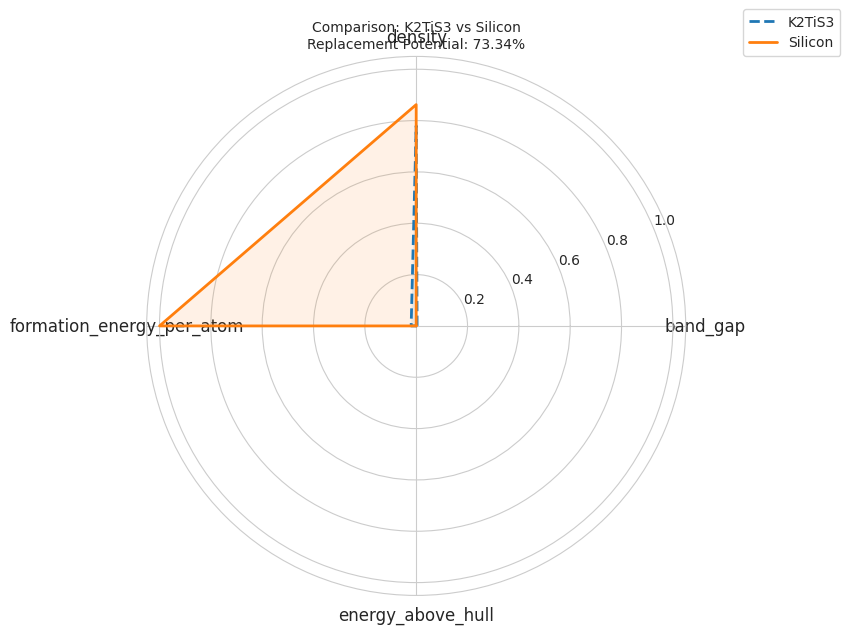

K2TiS3 has a 73.34% similarity to Silicon in terms of properties.


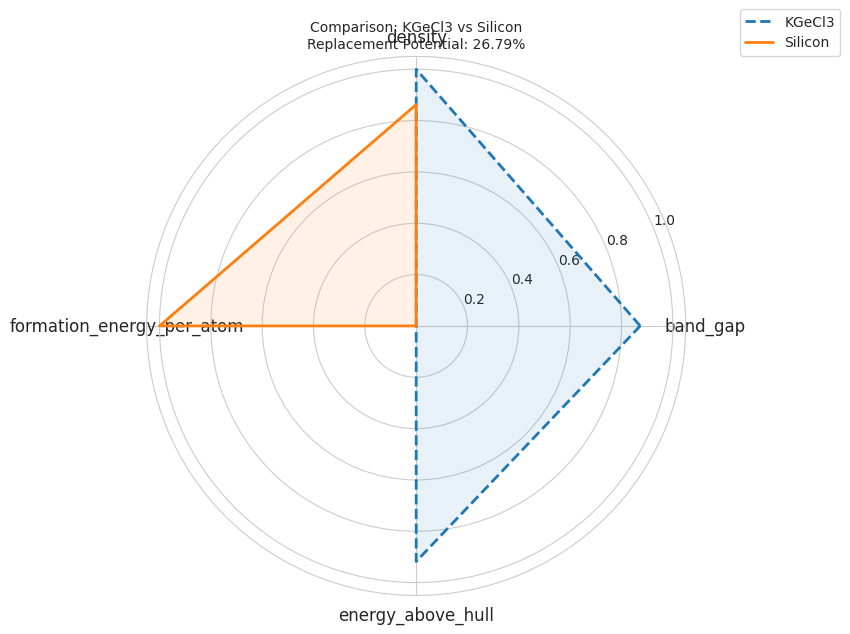

KGeCl3 has a 26.79% similarity to Silicon in terms of properties.


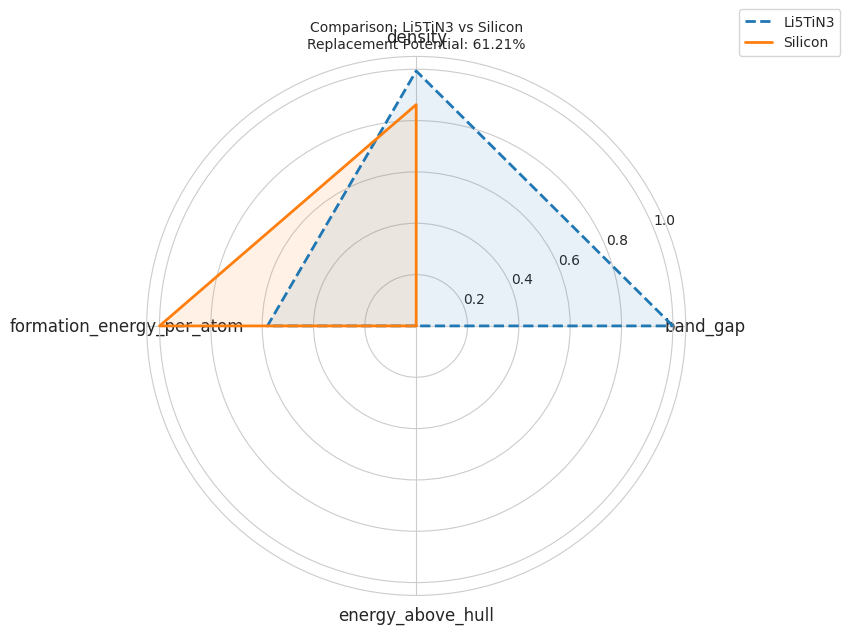

Li5TiN3 has a 61.21% similarity to Silicon in terms of properties.


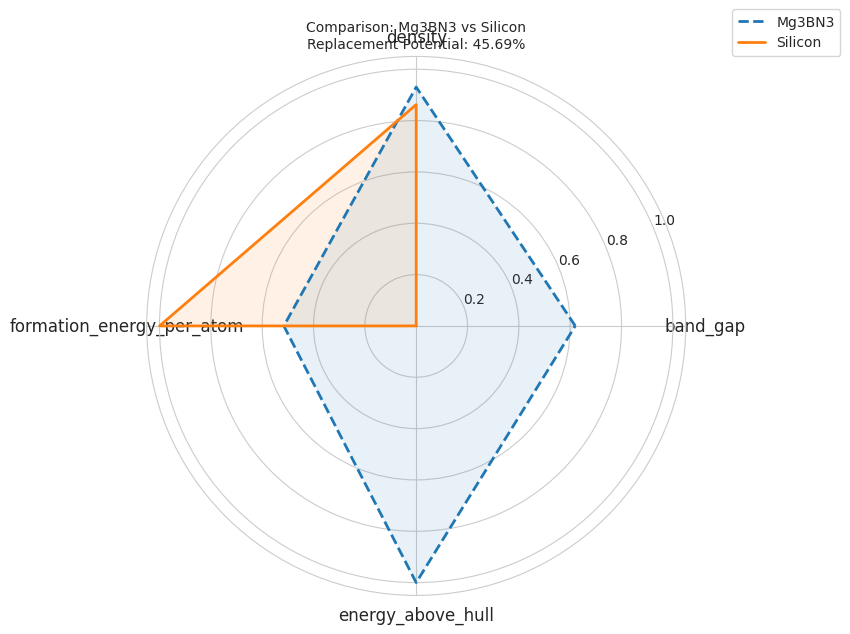

Mg3BN3 has a 45.69% similarity to Silicon in terms of properties.


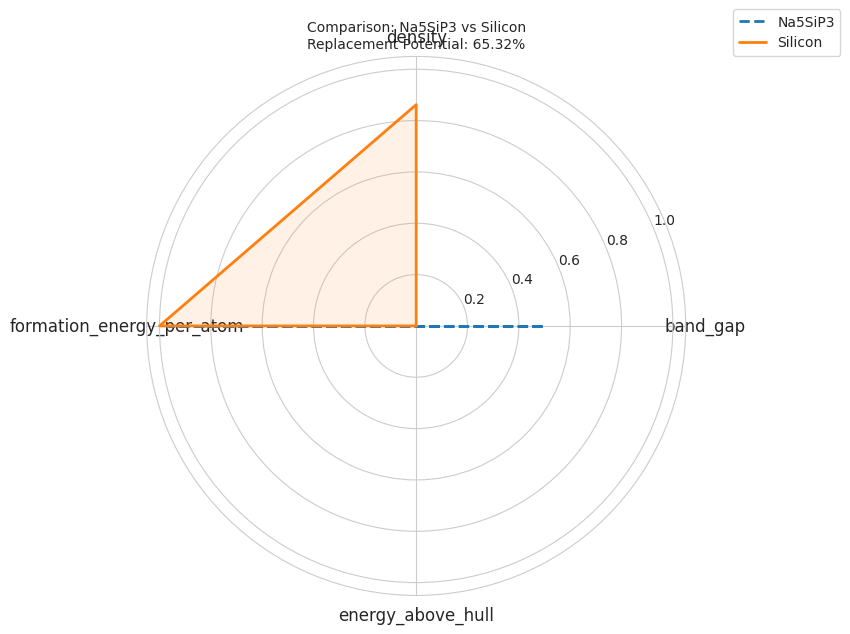

Na5SiP3 has a 65.32% similarity to Silicon in terms of properties.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_path = "best_solar_materials.csv"
df = pd.read_csv(file_path)
silicon_data = {
    "formula": "Silicon",
    "band_gap": 1.12,
    "density": 2.33,
    "formation_energy_per_atom": -0.5,
    "energy_above_hull": 0.0
}
df = pd.concat([pd.DataFrame([silicon_data]), df], ignore_index=True)
categories = ["band_gap", "density", "formation_energy_per_atom", "energy_above_hull"]
num_vars = len(categories)
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val) if max_val != min_val else 0.5
min_vals = df[categories].min()
max_vals = df[categories].max()
normalized_data = {
    row["formula"]: [normalize(row[prop], min_vals[prop], max_vals[prop]) for prop in categories]
    for _, row in df.iterrows()
}
silicon_values = np.array(normalized_data["Silicon"])
def plot_comparison(material):
    values = np.array(normalized_data[material])
    similarity = (1 - np.mean(np.abs(silicon_values - values))) * 100
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    values = values.tolist()
    values += values[:1]
    silicon_plot = silicon_values.tolist()
    silicon_plot += silicon_plot[:1]
    plt.figure(figsize=(7, 7))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, values, label=material, linewidth=2, linestyle='dashed')
    ax.fill(angles, values, alpha=0.1)
    ax.plot(angles, silicon_plot, label="Silicon", linewidth=2, linestyle='solid')
    ax.fill(angles, silicon_plot, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(f"Comparison: {material} vs Silicon\nReplacement Potential: {similarity:.2f}%", fontsize=10)
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.show()
    print(f"{material} has a {similarity:.2f}% similarity to Silicon in terms of properties.")
for material in df["formula"].unique():
    if material != "Silicon":
        plot_comparison(material)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
df = pd.read_csv("/content/solar_candidate_materials.csv")
df = df.drop(columns=['material_id', 'formula'], errors='ignore')
df = df.fillna(df.median())
df['label'] = df.apply(lambda x: 1 if 1.1 <= x.get('band_gap', 0) <= 1.7 and x.get('energy_above_hull', 1) < 0.1 else 0, axis=1)
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\n Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
joblib.dump(rf_model, "random_forest_model.pkl")
print("\n Trained models saved successfully.")


 Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


 Trained models saved successfully.
